In [21]:
import numpy as np
from pymoo.indicators.hv import HV
from pymoo.util.nds.non_dominated_sorting import NonDominatedSorting
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist
from itertools import product
from scipy.stats import qmc  # For Latin Hypercube Sampling
import torch
import gpytorch
import random
from PIL import Image
from datetime import datetime
#import scienceplots
from scipy.stats import norm
import functionBank as func
import optimiserBank as opt

from sklearn.preprocessing import MinMaxScaler
import scienceplots
plt.style.available
plt.style.use(['science', 'notebook'])
import glob
import os



In [22]:
functionDict = {func.binhAndKorn:[(0,5), (0,3)], 
                func.chankongHaimes:[(-20,20), (-20,20)], 
                func.fonsecaFleming:[(-4,4), (-4,4)], 
                func.ctp1:[(0,1), (0,1)], 
                func.constrEx:[(0.1,1), (0,5)], 
                func.testFunction4:[(-7,4), (-7,4)]}

scalarisingList = [ func.HypI,
                    func.chebyshev,
                    func.weightedSum, 
                    func.EWC, 
                    func.weightedPower,
                    func.weightedNorm, 
                    func.augmentedChebychev, 
                    func.modifiedChebychev, 
                    func.PBI, 
                    func.PAPBI]

files = glob.glob('/Users/benmoore/projects/elgarMOOOpt/txtFilesRunIII/*')

weights = np.array((0.5, 0.5))


# for key, value in functionDict.items():
    

#     for scalarisingFunction in scalarisingList:

#         targetsNeededSubstring = f'BOObjtvTargets{key.__name__}{scalarisingFunction.__name__}'
#         featuresNeededSubstring = f'BOFeatures{key.__name__}{scalarisingFunction.__name__}'
#         # plottingBounds = np.array(value)

#         print(targetsNeededSubstring, featuresNeededSubstring)

#         # Create a dictionary to hold the arrays
#         for file in files:

#             # if targetsNeededSubstring and featuresNeededSubstring not in file:
#             #     continue

#             if targetsNeededSubstring in file:
#                 targets = np.loadtxt(file)
#                 #select only first 20 initial sample points
#                 targets = targets[0:20]

#             if featuresNeededSubstring in file:
#                 features = np.loadtxt(file)
#                 features20 = features[0:20]
#         # print(targets)
#         # print(features)
#         zbests = np.min(targets, axis=0)
#         #need to now scalarise these targets:
#         scalarisedTargets = opt.scalariseValues(scalarisingFunction, targets, zbests, weights, 1, 100)

#         globalGP = opt.GPTrain(
#             features20, scalarisedTargets, meanPrior="zero"
#         )
        
#         plottingBounds = np.array(value)

#         x_range = np.linspace(plottingBounds[0, 0], plottingBounds[0, 1], 100)
#         y_range = np.linspace(plottingBounds[1, 0], plottingBounds[1, 1], 100)
#         fullRange = list(product(x_range, y_range))
#         fullRangeArray = np.array(fullRange)
#         # y_pred = self.objective_function.predict(fullRangeArray)
#         y_pred = opt.GPEval(globalGP, fullRangeArray)

#         plt.scatter(fullRangeArray[:,0], fullRangeArray[:,1], c = y_pred, alpha = 1)
#         plt.scatter(features20[:,0], features20[:,1], color='white', marker='x', alpha = 1)
#         plt.scatter(features[21,0], features[21,1], color='m', marker='x')
#         # plt.contour(fullRangeArray, y_pred, levels=10)
#         # plt.scatter(newSolution[0], newSolution[1], color='blue', label='Best Solution', s=10)
#         # plt.legend()
#         plt.title(f'{key.__name__}, {scalarisingFunction.__name__}')
#         plt.colorbar()
#         plt.xlabel('x1')
#         plt.ylabel('x2')
#         # plt.yscale('log')
#         plt.clim(np.min(y_pred), np.max(y_pred))
#         # plt.savefig('eiDE.png')
#         plt.show()

using PAPBI!
previousTheta =  0.1
selectedTheta =  1.0


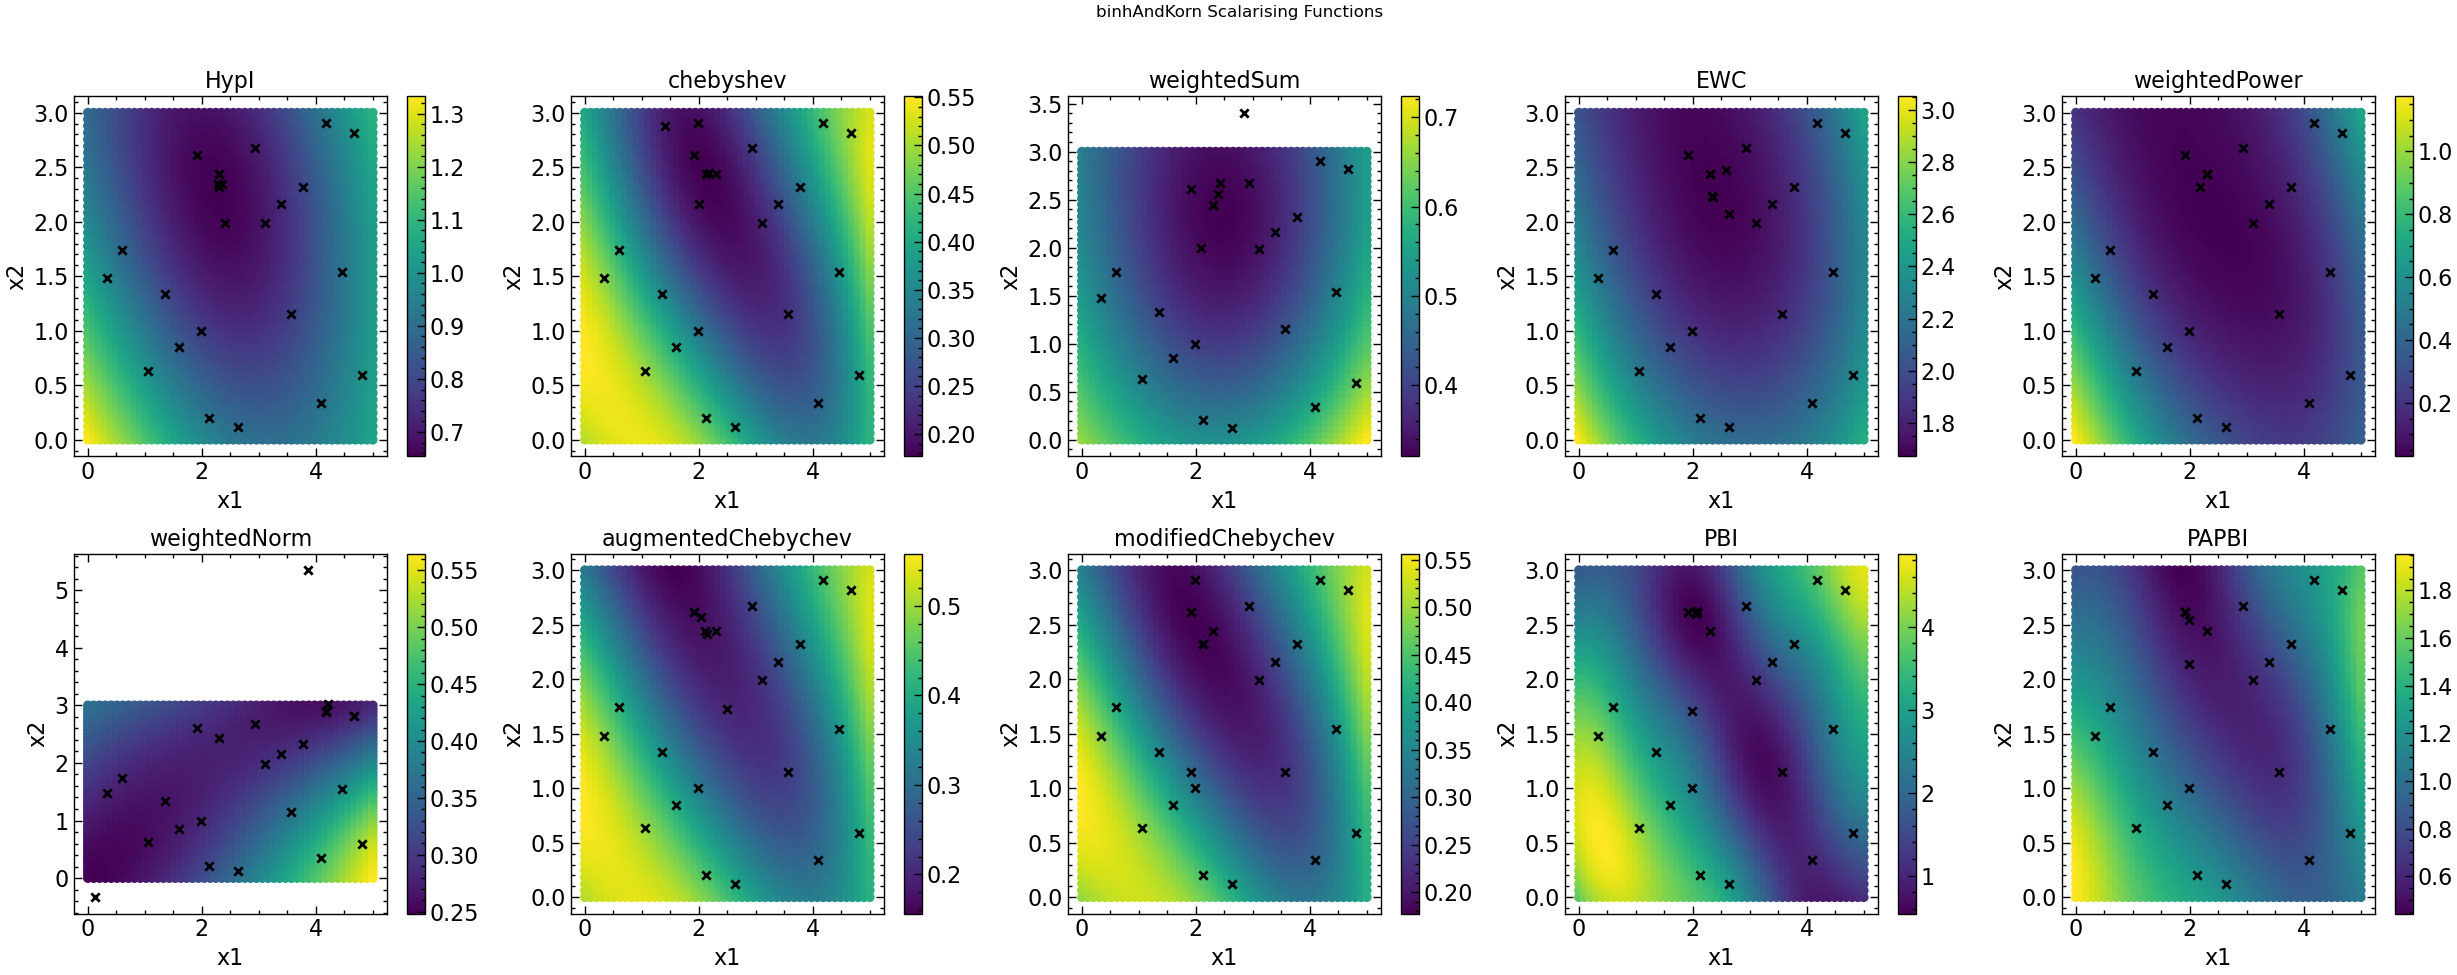

using PAPBI!
previousTheta =  1.0
selectedTheta =  0.1


KeyboardInterrupt: 

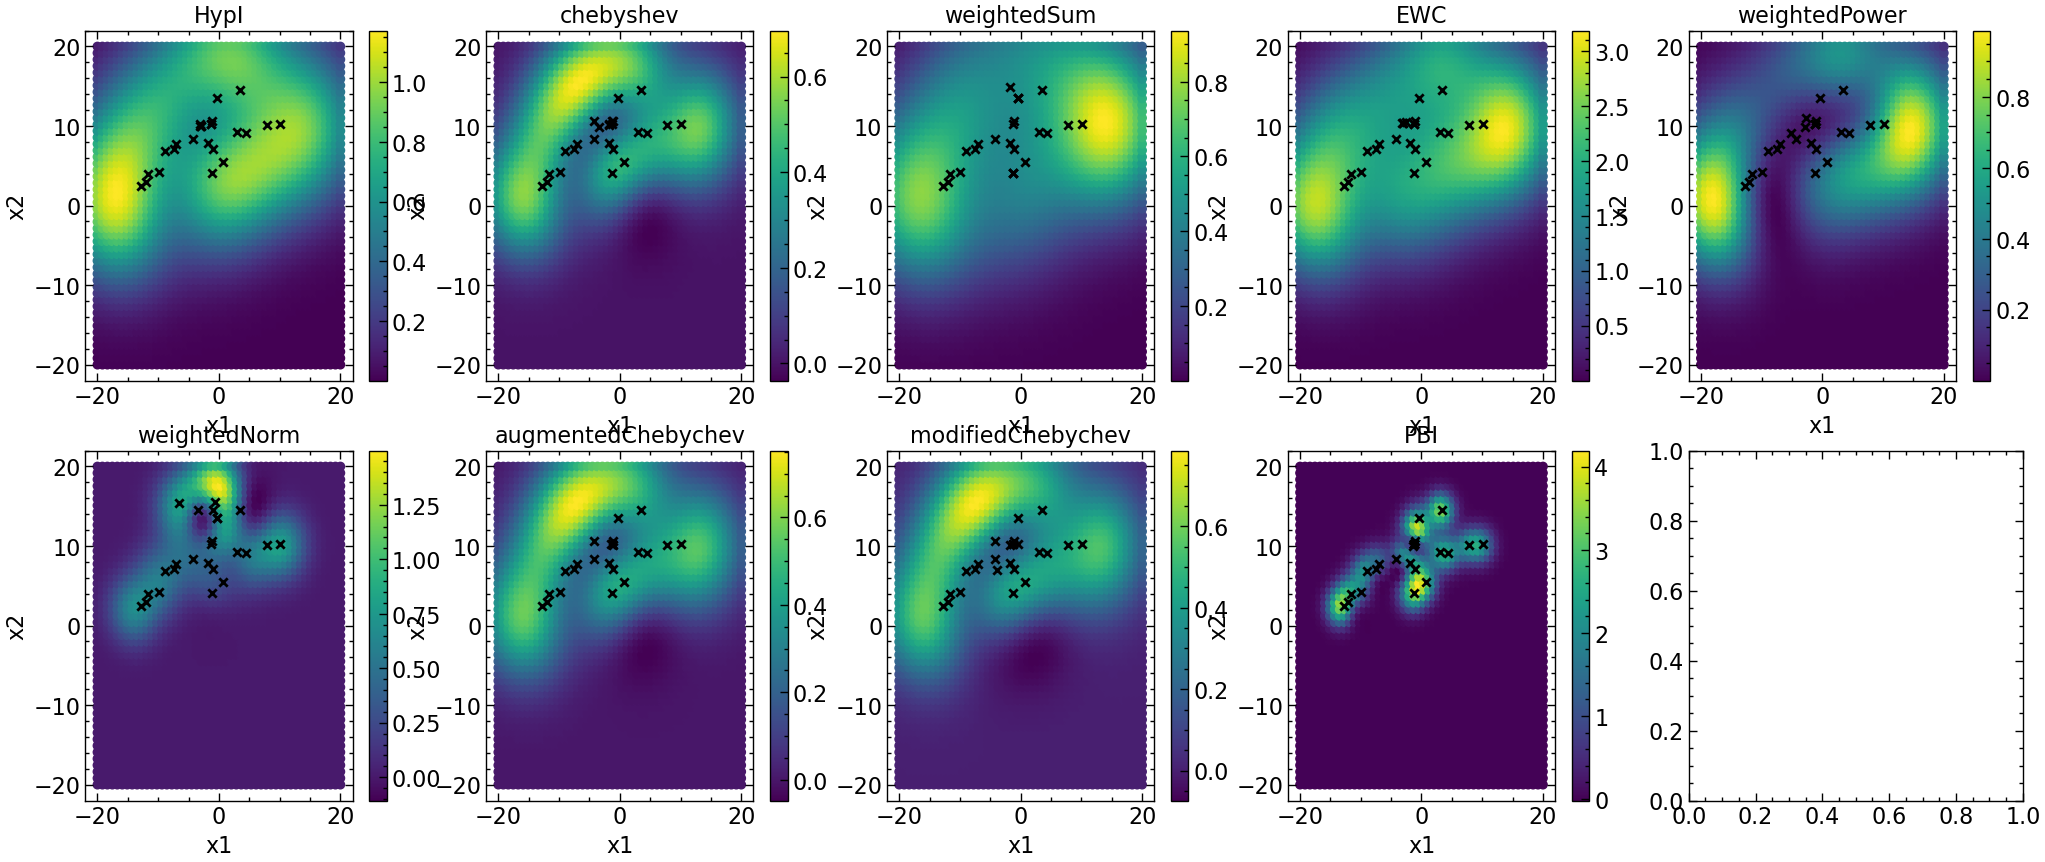

In [23]:
for key, value in functionDict.items():
    fig, axes = plt.subplots(2, 5, figsize=(25, 10))  # Create a grid of 2x5 for 10 plots
    axes = axes.flatten()

    for idx, scalarisingFunction in enumerate(scalarisingList):
        targetsNeededSubstring = f'ESAObjtvTargets{key.__name__}{scalarisingFunction.__name__}'
        featuresNeededSubstring = f'ESAFeatures{key.__name__}{scalarisingFunction.__name__}'

        targets, features = None, None
        
        # Load the data
        for file in files:
            if targetsNeededSubstring in file:
                targets = np.loadtxt(file)[:25]
            if featuresNeededSubstring in file:
                features = np.loadtxt(file)[:25]
                # feature21 = np.loadtxt(file)[21]

        if targets is None or features is None:
            continue

        zbests = np.min(targets, axis=0)
        scalarisedTargets = opt.scalariseValues(scalarisingFunction, targets, zbests, weights, 1, 100)

        globalGP = opt.GPTrain(features, scalarisedTargets, meanPrior="zero")

        plottingBounds = np.array(value)
        x_range = np.linspace(plottingBounds[0][0], plottingBounds[0][1], 50)
        y_range = np.linspace(plottingBounds[1][0], plottingBounds[1][1], 50)
        fullRange = list(product(x_range, y_range))
        fullRangeArray = np.array(fullRange)

        y_pred = opt.GPEval(globalGP, fullRangeArray)

        # Plot in the corresponding subplot
        ax = axes[idx]
        sc = ax.scatter(fullRangeArray[:, 0], fullRangeArray[:, 1], c=y_pred, alpha=1)
        ax.scatter(features[:, 0], features[:, 1], color='black', marker='x', alpha=1)
        # ax.scatter(feature21[0], feature21[1], color='m', marker='x')
        ax.set_title(f'{scalarisingFunction.__name__}')
        ax.set_xlabel('x1')
        ax.set_ylabel('x2')
        fig.colorbar(sc, ax=ax)

    fig.suptitle(f'{key.__name__} Scalarising Functions')
    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()
